# Featching Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

# Loading Dataset

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv')
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


In [3]:
df.shape

(907, 27)

In [4]:
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

In [5]:
df.dtypes

country                      object
country_long                 object
name                         object
gppd_idnr                    object
capacity_mw                 float64
latitude                    float64
longitude                   float64
primary_fuel                 object
other_fuel1                  object
other_fuel2                  object
other_fuel3                 float64
commissioning_year          float64
owner                        object
source                       object
url                          object
geolocation_source           object
wepp_id                     float64
year_of_capacity_data       float64
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
generation_gwh_2017         float64
generation_gwh_2018         float64
generation_gwh_2019         float64
generation_data_source       object
estimated_generation_gwh    float64
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

# Use the Label Encoder to convert object type columns:

In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [8]:
for i in df.columns:
    if df[i].dtypes == 'object':
        df[i] = le.fit_transform(df[i].values.reshape(-1, 1))
        
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,0,0,0,657,2.5,28.1839,73.2407,6,3,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
1,0,0,1,519,98.0,24.7663,74.6090,1,3,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
2,0,0,2,853,39.2,21.9038,69.3732,7,3,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
3,0,0,3,0,135.0,23.8712,91.3602,2,3,1,...,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,0,NaN
4,0,0,4,1,1800.0,21.9603,82.4091,1,2,1,...,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,0,0,902,491,1600.0,16.2949,77.3568,1,2,1,...,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,0,NaN
903,0,0,903,822,3.0,12.8932,78.1654,6,3,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
904,0,0,904,891,25.5,15.2758,75.5811,7,3,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
905,0,0,905,539,80.0,24.3500,73.7477,1,3,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN


In [9]:
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                   0
other_fuel2                   0
other_fuel3                 907
commissioning_year          380
owner                         0
source                        0
url                           0
geolocation_source            0
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source        0
estimated_generation_gwh    907
dtype: int64

<AxesSubplot:>

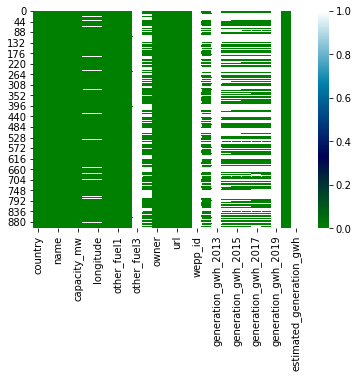

In [10]:
sns.heatmap(df.isnull(), cmap='ocean')

Observation: Here, we can see that column 'other fuel, wepp_id, gwh_2013,2019 and estimated_gwh'have missing values. So, we should remove them from our dataset.

# Drop Unnecessary & Totaly Missed Columns:

In [11]:
df.drop(['country','country_long','other_fuel3','wepp_id','year_of_capacity_data','generation_gwh_2013','generation_gwh_2019','estimated_generation_gwh'],axis = 1, inplace = True)

In [12]:
df

,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,commissioning_year,owner,source,url,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,0,657,2.5,28.1839,73.2407,6,3,1,2011.0,229,109,128,1,NaN,NaN,NaN,NaN,NaN,1
1,1,519,98.0,24.7663,74.6090,1,3,1,NaN,258,174,173,2,NaN,NaN,NaN,NaN,NaN,1
2,2,853,39.2,21.9038,69.3732,7,3,1,NaN,2,21,205,2,NaN,NaN,NaN,NaN,NaN,1
3,3,0,135.0,23.8712,91.3602,2,3,1,2004.0,280,22,58,2,617.789264,843.747000,886.004428,663.774500,626.239128,0
4,4,1,1800.0,21.9603,82.4091,1,2,1,2015.0,280,22,58,2,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,902,491,1600.0,16.2949,77.3568,1,2,1,2016.0,280,22,58,2,NaN,0.994875,233.596650,865.400000,686.500000,0
903,903,822,3.0,12.8932,78.1654,6,3,1,NaN,114,77,22,0,NaN,NaN,NaN,NaN,NaN,1
904,904,891,25.5,15.2758,75.5811,7,3,1,NaN,280,21,260,2,NaN,NaN,NaN,NaN,NaN,1
905,905,539,80.0,24.3500,73.7477,1,3,1,NaN,91,59,82,2,NaN,NaN,NaN,NaN,NaN,1


# Filling NaN values:

In [13]:
df.interpolate(inplace = True)
df

,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,commissioning_year,owner,source,url,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,0,657,2.5,28.1839,73.2407,6,3,1,2011.000000,229,109,128,1,NaN,NaN,NaN,NaN,NaN,1
1,1,519,98.0,24.7663,74.6090,1,3,1,2008.666667,258,174,173,2,NaN,NaN,NaN,NaN,NaN,1
2,2,853,39.2,21.9038,69.3732,7,3,1,2006.333333,2,21,205,2,NaN,NaN,NaN,NaN,NaN,1
3,3,0,135.0,23.8712,91.3602,2,3,1,2004.000000,280,22,58,2,617.789264,843.747000,886.004428,663.774500,626.239128,0
4,4,1,1800.0,21.9603,82.4091,1,2,1,2015.000000,280,22,58,2,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,902,491,1600.0,16.2949,77.3568,1,2,1,2016.000000,280,22,58,2,0.000000,0.994875,233.596650,865.400000,686.500000,0
903,903,822,3.0,12.8932,78.1654,6,3,1,2016.000000,114,77,22,0,0.000000,0.994875,233.596650,865.400000,686.500000,1
904,904,891,25.5,15.2758,75.5811,7,3,1,2016.000000,280,21,260,2,0.000000,0.994875,233.596650,865.400000,686.500000,1
905,905,539,80.0,24.3500,73.7477,1,3,1,2016.000000,91,59,82,2,0.000000,0.994875,233.596650,865.400000,686.500000,1


Observation: Here, we use interpolate method to convert nan values in integer dtype columns.

In [14]:
df.fillna(method = 'bfill', inplace = True)
df

,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,commissioning_year,owner,source,url,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,0,657,2.5,28.1839,73.2407,6,3,1,2011.000000,229,109,128,1,617.789264,843.747000,886.004428,663.774500,626.239128,1
1,1,519,98.0,24.7663,74.6090,1,3,1,2008.666667,258,174,173,2,617.789264,843.747000,886.004428,663.774500,626.239128,1
2,2,853,39.2,21.9038,69.3732,7,3,1,2006.333333,2,21,205,2,617.789264,843.747000,886.004428,663.774500,626.239128,1
3,3,0,135.0,23.8712,91.3602,2,3,1,2004.000000,280,22,58,2,617.789264,843.747000,886.004428,663.774500,626.239128,0
4,4,1,1800.0,21.9603,82.4091,1,2,1,2015.000000,280,22,58,2,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,902,491,1600.0,16.2949,77.3568,1,2,1,2016.000000,280,22,58,2,0.000000,0.994875,233.596650,865.400000,686.500000,0
903,903,822,3.0,12.8932,78.1654,6,3,1,2016.000000,114,77,22,0,0.000000,0.994875,233.596650,865.400000,686.500000,1
904,904,891,25.5,15.2758,75.5811,7,3,1,2016.000000,280,21,260,2,0.000000,0.994875,233.596650,865.400000,686.500000,1
905,905,539,80.0,24.3500,73.7477,1,3,1,2016.000000,91,59,82,2,0.000000,0.994875,233.596650,865.400000,686.500000,1


Observation: Here, we use bfill means backward fill method to fill rest of nan values.

In [15]:
df.isnull().sum()

name                      0
gppd_idnr                 0
capacity_mw               0
latitude                  0
longitude                 0
primary_fuel              0
other_fuel1               0
other_fuel2               0
commissioning_year        0
owner                     0
source                    0
url                       0
geolocation_source        0
generation_gwh_2014       0
generation_gwh_2015       0
generation_gwh_2016       0
generation_gwh_2017       0
generation_gwh_2018       0
generation_data_source    0
dtype: int64

Observation: Here,we see all missing values are converted.

In [16]:
df.shape

(907, 19)

# EDA Process

In [17]:
df.describe()

,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,commissioning_year,owner,source,url,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
count,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000
mean,453.000000,453.000000,326.223755,21.220626,77.461197,3.206174,2.777288,0.998897,1998.281698,227.476295,43.847850,94.469680,1.754135,2347.101377,2440.952504,2432.444181,2478.047923,2582.286956,0.504961
std,261.972645,261.972645,590.085456,6.174688,4.922711,2.280652,0.429348,0.033204,15.135814,83.924045,44.642818,70.381222,0.700183,3474.009022,3664.011008,3634.056727,3605.156683,3758.181113,0.500251
min,0.000000,0.000000,0.000000,8.168900,68.644700,0.000000,0.000000,0.000000,1927.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,226.500000,226.500000,16.725000,16.869475,74.304200,1.000000,3.000000,1.000000,1991.000000,188.500000,22.000000,58.000000,2.000000,382.275214,331.823825,279.569298,307.327533,315.660250,0.000000
50%,453.000000,453.000000,59.200000,21.780000,76.670900,3.000000,3.000000,1.000000,2001.000000,280.000000,22.000000,58.000000,2.000000,1121.654472,1189.572250,1229.480000,1283.850600,1221.500000,1.000000
75%,679.500000,679.500000,385.250000,25.405250,79.441250,6.000000,3.000000,1.000000,2010.847826,280.000000,29.500000,115.500000,2.000000,2854.279538,3082.747500,3195.421652,3172.926835,3288.949783,1.000000
max,906.000000,906.000000,4760.000000,34.649000,95.408000,7.000000,3.000000,1.000000,2018.000000,280.000000,190.000000,303.000000,3.000000,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000,1.000000


Observation: 
Describe method shows us the total count value, mean, standard deviation, minimum value, maximum value, median, 25% and 75% of data of each columns.
Standard deviation shows spread of data.
50% is showing the median of data.
The gap between maximum and 75% is shows us skewness of column. If it is higher then that column, has skewness else there is no skewnes present in dataset.

# Find Correlation:

In [18]:
df.corr()

,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,commissioning_year,owner,source,url,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
name,1.000000,0.332205,0.060240,-0.139400,0.009452,0.040753,-0.035180,-0.045426,-0.063130,0.117954,-0.014640,0.041917,0.045882,0.120754,0.104966,0.074322,0.096930,0.112691,-0.005862
gppd_idnr,0.332205,1.000000,-0.335742,-0.101727,-0.391851,0.609180,0.367177,0.001650,0.118075,-0.602038,0.416384,0.597080,-0.410443,0.050456,0.065756,0.032193,0.027486,0.039328,0.734832
capacity_mw,0.060240,-0.335742,1.000000,0.048780,0.192772,-0.380395,-0.606289,0.003731,0.196126,0.304322,-0.242122,-0.243830,0.183419,0.536641,0.544684,0.588585,0.620588,0.624579,-0.495833
latitude,-0.139400,-0.101727,0.048780,1.000000,0.032707,-0.002877,-0.026442,0.032498,0.073943,0.002329,0.056287,-0.122973,-0.168181,0.091995,0.087320,0.086866,0.089261,0.079961,-0.079652
longitude,0.009452,-0.391851,0.192772,0.032707,1.000000,-0.356613,-0.276439,0.005395,0.038304,0.279348,-0.235507,-0.315145,0.227035,0.018124,0.008904,0.029412,0.036987,0.030647,-0.400986
primary_fuel,0.040753,0.609180,-0.380395,-0.002877,-0.356613,1.000000,0.476410,0.032156,-0.049309,-0.260389,0.053613,0.589886,-0.420263,-0.076141,-0.064216,-0.090603,-0.103061,-0.089723,0.482339
other_fuel1,-0.035180,0.367177,-0.606289,-0.026442,-0.276439,0.476410,1.000000,0.215024,-0.236443,-0.324999,0.254138,0.269084,-0.182347,-0.270246,-0.255767,-0.277269,-0.301798,-0.295835,0.524183
other_fuel2,-0.045426,0.001650,0.003731,0.032498,0.005395,0.032156,0.215024,1.000000,-0.001578,-0.020804,0.016268,0.017225,-0.011672,0.002610,0.003736,0.007697,0.008551,0.012036,0.033554
commissioning_year,-0.063130,0.118075,0.196126,0.073943,0.038304,-0.049309,-0.236443,-0.001578,1.000000,-0.079936,0.078453,0.050903,-0.105275,0.082644,0.110646,0.128265,0.131896,0.140248,-0.007656
owner,0.117954,-0.602038,0.304322,0.002329,0.279348,-0.260389,-0.324999,-0.020804,-0.079936,1.000000,-0.243587,-0.190672,0.398212,-0.003744,-0.029785,-0.018022,-0.012677,-0.020019,-0.620010


# Data Visualization:

<AxesSubplot:>

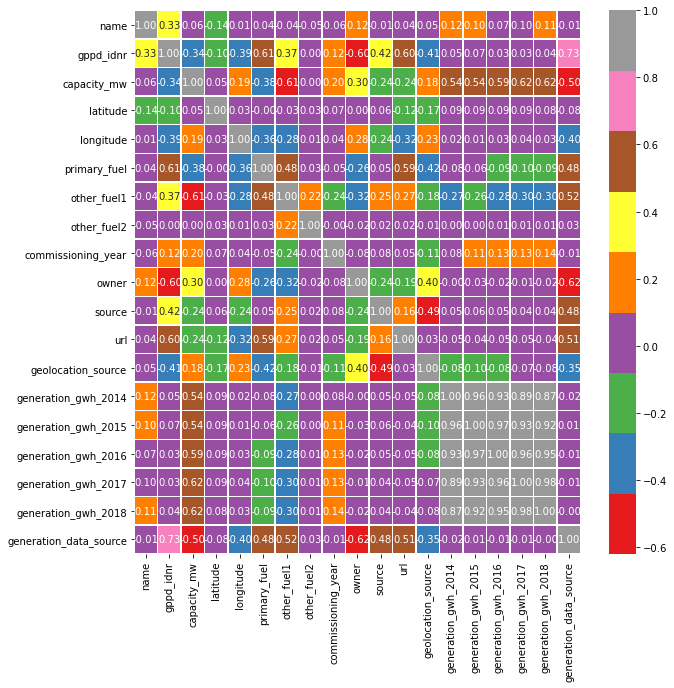

In [19]:
plt.figure(figsize = (10, 10))
sns.heatmap(df.corr(), annot = True, cmap = 'Set1', linewidths = 0.5, fmt = '.2f')

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   name                    907 non-null    int32  
 1   gppd_idnr               907 non-null    int32  
 2   capacity_mw             907 non-null    float64
 3   latitude                907 non-null    float64
 4   longitude               907 non-null    float64
 5   primary_fuel            907 non-null    int32  
 6   other_fuel1             907 non-null    int32  
 7   other_fuel2             907 non-null    int32  
 8   commissioning_year      907 non-null    float64
 9   owner                   907 non-null    int32  
 10  source                  907 non-null    int32  
 11  url                     907 non-null    int32  
 12  geolocation_source      907 non-null    int32  
 13  generation_gwh_2014     907 non-null    float64
 14  generation_gwh_2015     907 non-null    fl

<AxesSubplot:xlabel='name', ylabel='capacity_mw'>

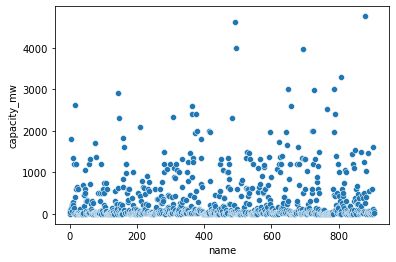

In [21]:
sns.scatterplot(x = 'name', y = 'capacity_mw', data = df)

<AxesSubplot:xlabel='gppd_idnr', ylabel='capacity_mw'>

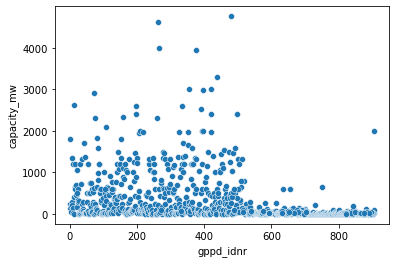

In [22]:
sns.scatterplot(x = 'gppd_idnr', y = 'capacity_mw', data = df)

<AxesSubplot:xlabel='latitude', ylabel='capacity_mw'>

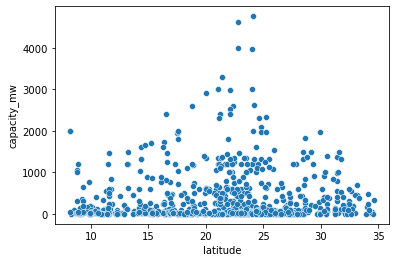

In [23]:
sns.scatterplot(x = 'latitude', y = 'capacity_mw', data = df)

<AxesSubplot:xlabel='longitude', ylabel='capacity_mw'>

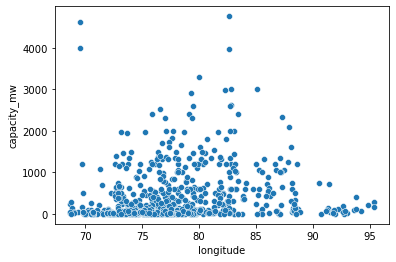

In [24]:
sns.scatterplot(x = 'longitude', y = 'capacity_mw', data = df)

<AxesSubplot:xlabel='primary_fuel', ylabel='capacity_mw'>

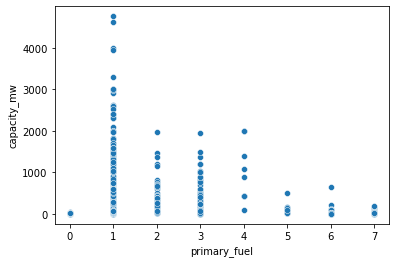

In [25]:
sns.scatterplot(x = 'primary_fuel', y = 'capacity_mw', data = df)

<AxesSubplot:xlabel='other_fuel1', ylabel='capacity_mw'>

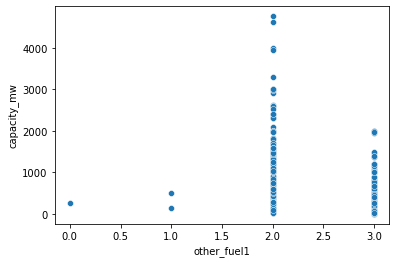

In [26]:
sns.scatterplot(x = 'other_fuel1', y = 'capacity_mw', data = df)

<AxesSubplot:xlabel='other_fuel2', ylabel='capacity_mw'>

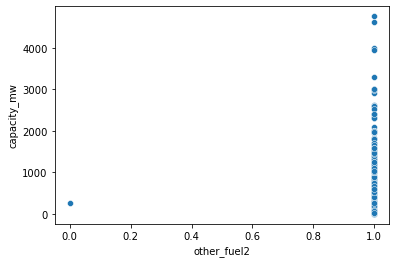

In [27]:
sns.scatterplot(x = 'other_fuel2', y = 'capacity_mw', data = df)

<AxesSubplot:xlabel='commissioning_year', ylabel='capacity_mw'>

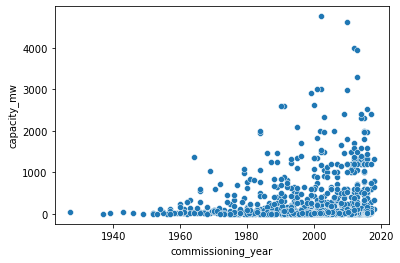

In [28]:
sns.scatterplot(x = 'commissioning_year', y = 'capacity_mw', data = df)

<AxesSubplot:xlabel='owner', ylabel='capacity_mw'>

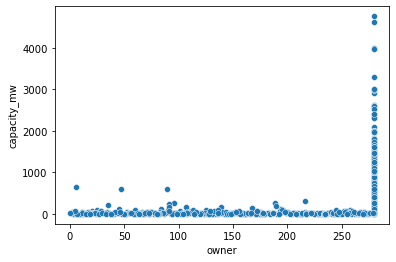

In [29]:
sns.scatterplot(x = 'owner', y = 'capacity_mw', data = df)

<AxesSubplot:xlabel='source', ylabel='capacity_mw'>

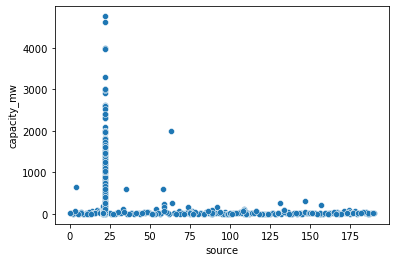

In [30]:
sns.scatterplot(x = 'source', y = 'capacity_mw', data = df)

<AxesSubplot:xlabel='geolocation_source', ylabel='capacity_mw'>

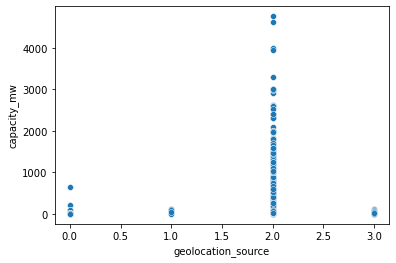

In [31]:
sns.scatterplot(x = 'geolocation_source', y = 'capacity_mw', data = df)

<AxesSubplot:xlabel='generation_gwh_2014', ylabel='capacity_mw'>

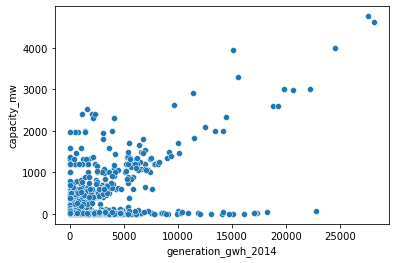

In [32]:
sns.scatterplot(x = 'generation_gwh_2014', y = 'capacity_mw', data = df)

<AxesSubplot:xlabel='generation_data_source', ylabel='capacity_mw'>

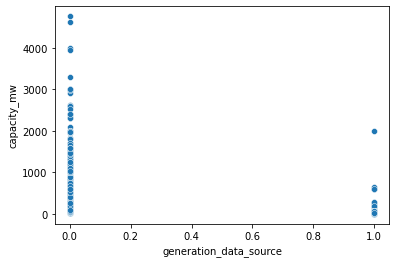

In [33]:
sns.scatterplot(x = 'generation_data_source', y = 'capacity_mw', data = df)

In [34]:
#sns.pairplot(df)

# Checking Skewness:

In [35]:
df.shape

(907, 19)

In [36]:
df.skew()

name                       0.000000
gppd_idnr                  0.000000
capacity_mw                3.123576
latitude                  -0.145797
longitude                  1.101240
primary_fuel               0.472251
other_fuel1               -1.626786
other_fuel2              -30.116441
commissioning_year        -1.155829
owner                     -1.373940
source                     1.827373
url                        1.510537
geolocation_source        -1.920302
generation_gwh_2014        3.365549
generation_gwh_2015        3.581032
generation_gwh_2016        3.458511
generation_gwh_2017        3.545200
generation_gwh_2018        3.358366
generation_data_source    -0.019880
dtype: float64

In [37]:
from scipy.stats import skew

name
0.0


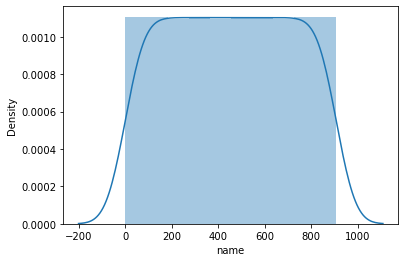

gppd_idnr
0.0


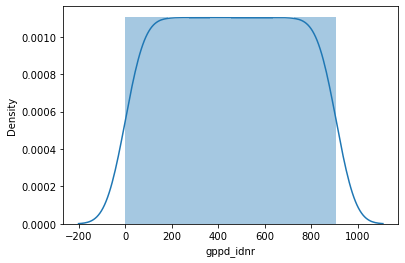

capacity_mw
3.1184079967331835


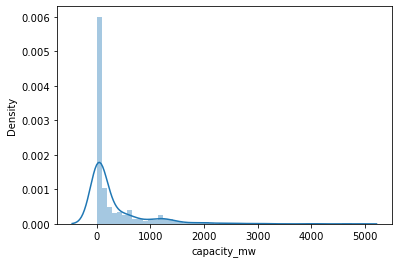

latitude
-0.14555604338955788


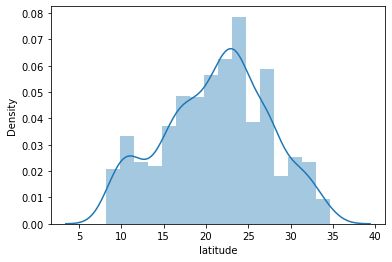

longitude
1.09941828146012


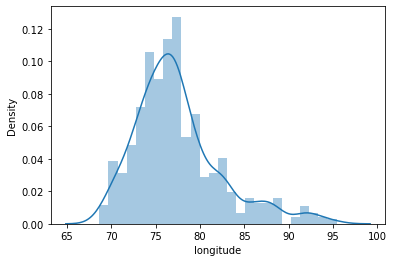

primary_fuel
0.4714691858252111


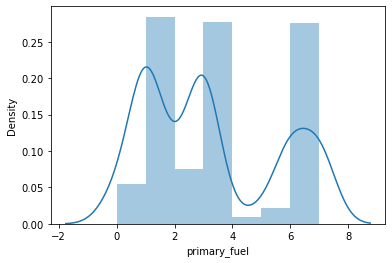

other_fuel1
-1.6240940035487628


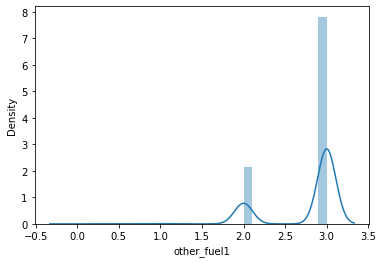

other_fuel2
-30.066611111875574


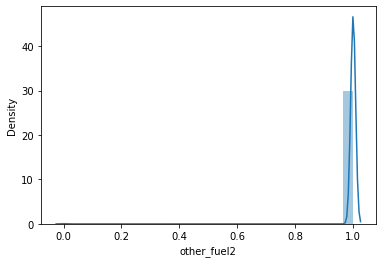

commissioning_year
-1.1539164525133176


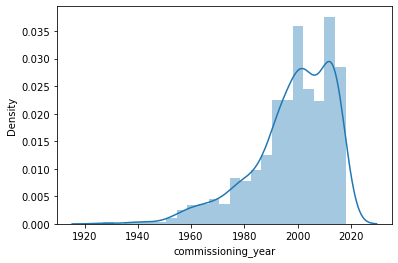

owner
-1.3716669325118434


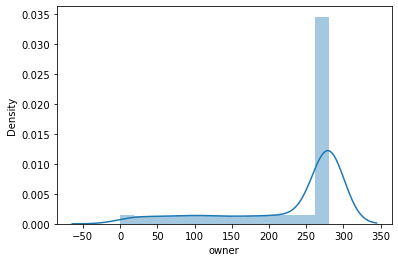

source
1.8243499230136286


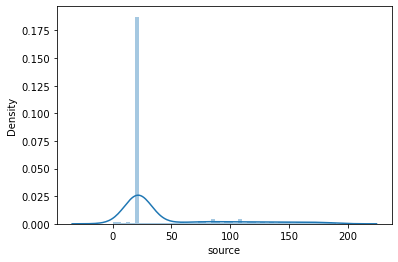

url
1.5080377540354624


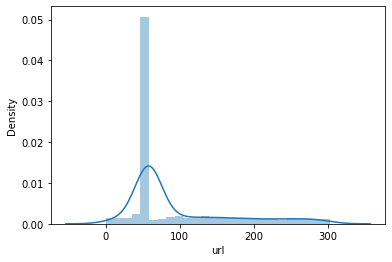

geolocation_source
-1.9171242502990142


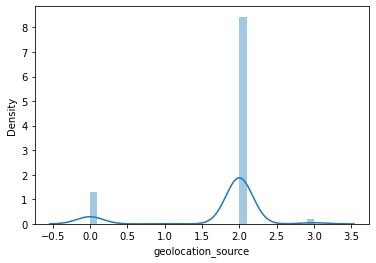

generation_gwh_2014
3.359980290455471


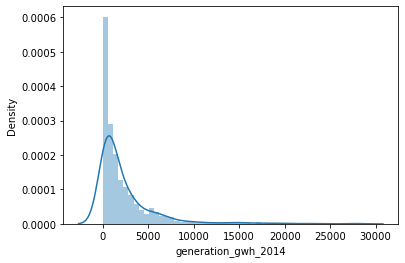

generation_gwh_2015
3.575107297459019


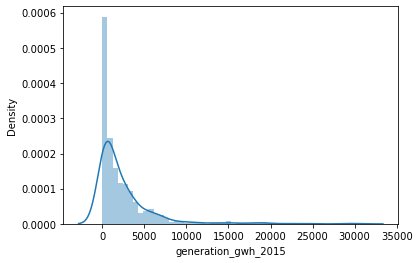

generation_gwh_2016
3.452788749687999


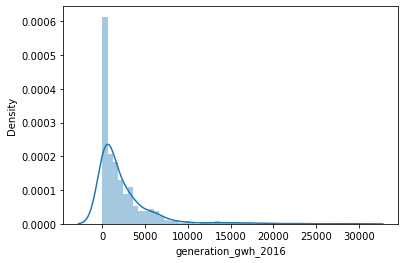

generation_gwh_2017
3.5393341272163585


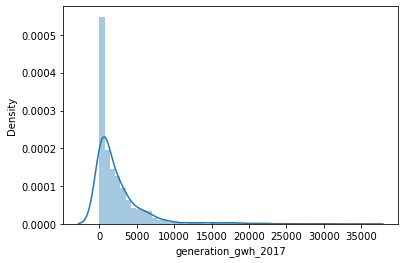

generation_gwh_2018
3.3528096623693693


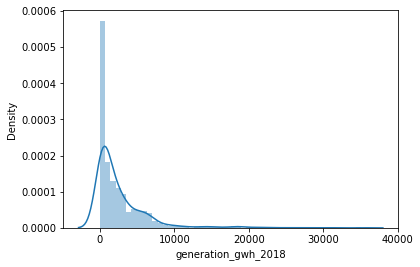

generation_data_source
-0.01984662208059675


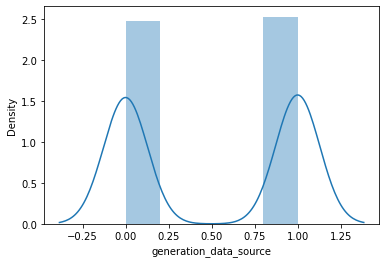

In [38]:
for i in df:
    print(i)
    print(skew(df[i]))

    plt.figure()
    sns.distplot(df[i])
    plt.show()

# Remove Skewness:

In [39]:
df['generation_gwh_2014'] = np.sqrt(df['generation_gwh_2014'])

In [40]:
skew(df['generation_gwh_2014'])

1.2897111319967383

In [41]:
df['generation_gwh_2015'] = np.sqrt(df['generation_gwh_2015'])
df['generation_gwh_2016'] = np.sqrt(df['generation_gwh_2016'])
df['generation_gwh_2017'] = np.sqrt(df['generation_gwh_2017'])
df['generation_gwh_2018'] = np.sqrt(df['generation_gwh_2018'])

In [42]:
print(skew(df['generation_gwh_2015']))
print(skew(df['generation_gwh_2016']))
print(skew(df['generation_gwh_2017']))
print(skew(df['generation_gwh_2018']))

1.2616414047154387
1.2336016121082407
1.1675180976842363
1.133353856299619


Observation: Here, we use square root method to reduce skewness and we get results.

# Finding Outliers:

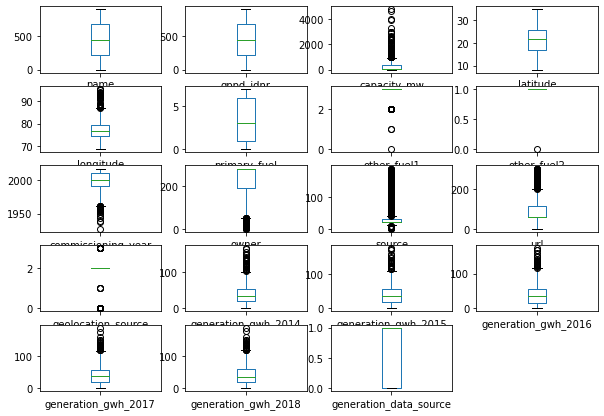

In [43]:
df.plot(kind = 'box', subplots = True, layout = (7,4), figsize = (10,10))
plt.show()

# Remove Outliers:

In [44]:
from scipy.stats import zscore
import numpy as np
z = np.abs(zscore(df))
threshold = 3
np.where(z>3)

(array([ 15,  15,  71,  80, 143, 147, 179, 183, 191, 209, 244, 299, 308,
        321, 323, 333, 340, 345, 360, 363, 364, 364, 364, 364, 364, 364,
        375, 416, 427, 478, 482, 484, 491, 491, 491, 492, 492, 492, 492,
        492, 493, 493, 493, 493, 493, 493, 494, 494, 494, 494, 494, 494,
        499, 519, 538, 573, 577, 601, 621, 638, 648, 648, 648, 648, 648,
        648, 657, 657, 657, 657, 657, 657, 658, 658, 658, 658, 659, 659,
        659, 660, 661, 669, 689, 695, 695, 695, 695, 695, 696, 696, 696,
        709, 725, 725, 725, 725, 725, 726, 726, 726, 726, 726, 726, 728,
        767, 786, 786, 786, 786, 786, 786, 788, 808, 808, 808, 808, 808,
        808, 811, 811, 813, 817, 818, 832, 870, 871, 879, 879, 879, 880,
        880, 880, 880, 880, 880, 881, 881, 895, 900], dtype=int64),
 array([ 2, 17, 10, 10,  2,  2,  4,  4, 10,  2,  4, 10,  2, 10,  4,  4,  4,
        10,  4,  2,  2, 13, 14, 15, 16, 17,  2,  4,  4,  8,  2,  8, 13, 14,
        15, 13, 14, 15, 16, 17,  2, 13, 14, 15, 16

In [45]:
df_zscore = df[(z<3).all(axis = 1)]
df_zscore

,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,commissioning_year,owner,source,url,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,0,657,2.5,28.1839,73.2407,6,3,1,2011.000000,229,109,128,1,24.855367,29.047323,29.765827,25.763822,25.024770,1
1,1,519,98.0,24.7663,74.6090,1,3,1,2008.666667,258,174,173,2,24.855367,29.047323,29.765827,25.763822,25.024770,1
2,2,853,39.2,21.9038,69.3732,7,3,1,2006.333333,2,21,205,2,24.855367,29.047323,29.765827,25.763822,25.024770,1
3,3,0,135.0,23.8712,91.3602,2,3,1,2004.000000,280,22,58,2,24.855367,29.047323,29.765827,25.763822,25.024770,0
4,4,1,1800.0,21.9603,82.4091,1,2,1,2015.000000,280,22,58,2,55.095826,76.917943,79.012657,73.386509,85.317056,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,902,491,1600.0,16.2949,77.3568,1,2,1,2016.000000,280,22,58,2,0.000000,0.997434,15.283869,29.417682,26.201145,0
903,903,822,3.0,12.8932,78.1654,6,3,1,2016.000000,114,77,22,0,0.000000,0.997434,15.283869,29.417682,26.201145,1
904,904,891,25.5,15.2758,75.5811,7,3,1,2016.000000,280,21,260,2,0.000000,0.997434,15.283869,29.417682,26.201145,1
905,905,539,80.0,24.3500,73.7477,1,3,1,2016.000000,91,59,82,2,0.000000,0.997434,15.283869,29.417682,26.201145,1


In [46]:
df_zscore.shape

(839, 19)

# Finding Percentage Of Loss Data:

In [47]:
Data_loss = ((907 - 839)/907)*100
Data_loss

7.497243660418963

# Separating data into independent variable and target:

In [48]:
df

,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,commissioning_year,owner,source,url,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,0,657,2.5,28.1839,73.2407,6,3,1,2011.000000,229,109,128,1,24.855367,29.047323,29.765827,25.763822,25.024770,1
1,1,519,98.0,24.7663,74.6090,1,3,1,2008.666667,258,174,173,2,24.855367,29.047323,29.765827,25.763822,25.024770,1
2,2,853,39.2,21.9038,69.3732,7,3,1,2006.333333,2,21,205,2,24.855367,29.047323,29.765827,25.763822,25.024770,1
3,3,0,135.0,23.8712,91.3602,2,3,1,2004.000000,280,22,58,2,24.855367,29.047323,29.765827,25.763822,25.024770,0
4,4,1,1800.0,21.9603,82.4091,1,2,1,2015.000000,280,22,58,2,55.095826,76.917943,79.012657,73.386509,85.317056,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,902,491,1600.0,16.2949,77.3568,1,2,1,2016.000000,280,22,58,2,0.000000,0.997434,15.283869,29.417682,26.201145,0
903,903,822,3.0,12.8932,78.1654,6,3,1,2016.000000,114,77,22,0,0.000000,0.997434,15.283869,29.417682,26.201145,1
904,904,891,25.5,15.2758,75.5811,7,3,1,2016.000000,280,21,260,2,0.000000,0.997434,15.283869,29.417682,26.201145,1
905,905,539,80.0,24.3500,73.7477,1,3,1,2016.000000,91,59,82,2,0.000000,0.997434,15.283869,29.417682,26.201145,1


In [49]:
x = df.drop(columns = ['capacity_mw'], axis = 1)
y = df['capacity_mw']

In [50]:
x

,name,gppd_idnr,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,commissioning_year,owner,source,url,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,0,657,28.1839,73.2407,6,3,1,2011.000000,229,109,128,1,24.855367,29.047323,29.765827,25.763822,25.024770,1
1,1,519,24.7663,74.6090,1,3,1,2008.666667,258,174,173,2,24.855367,29.047323,29.765827,25.763822,25.024770,1
2,2,853,21.9038,69.3732,7,3,1,2006.333333,2,21,205,2,24.855367,29.047323,29.765827,25.763822,25.024770,1
3,3,0,23.8712,91.3602,2,3,1,2004.000000,280,22,58,2,24.855367,29.047323,29.765827,25.763822,25.024770,0
4,4,1,21.9603,82.4091,1,2,1,2015.000000,280,22,58,2,55.095826,76.917943,79.012657,73.386509,85.317056,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,902,491,16.2949,77.3568,1,2,1,2016.000000,280,22,58,2,0.000000,0.997434,15.283869,29.417682,26.201145,0
903,903,822,12.8932,78.1654,6,3,1,2016.000000,114,77,22,0,0.000000,0.997434,15.283869,29.417682,26.201145,1
904,904,891,15.2758,75.5811,7,3,1,2016.000000,280,21,260,2,0.000000,0.997434,15.283869,29.417682,26.201145,1
905,905,539,24.3500,73.7477,1,3,1,2016.000000,91,59,82,2,0.000000,0.997434,15.283869,29.417682,26.201145,1


In [51]:
y

0         2.5
1        98.0
2        39.2
3       135.0
4      1800.0
        ...  
902    1600.0
903       3.0
904      25.5
905      80.0
906      16.5
Name: capacity_mw, Length: 907, dtype: float64

# Training & Testing

In [52]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size =.2, random_state = 121)

Observation: Here, we use 80% of data for training and rest of 20% for testing.

# Model Selection:

In [55]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC 

In [56]:
dtc = DecisionTreeClassifier()
knn = KNeighborsClassifier()
svc = SVC()
mnb = MultinomialNB()

In [58]:
model = [dtc,knn,svc,mnb]

for m in model:
    m.fit(x_train, y_train)
    m.score(x_train, y_train)
    predm = m.predict(x_test)
    print('Accuracy score of', m, 'is :')
    print(accuracy_score(y_test, predm))
    print(confusion_matrix(y_test, predm))
    print(classification_report(y_test, predm))
    print('\n')

ValueError: Unknown label type: 'continuous'